In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder
import pickle

In [2]:
data = pd.read_csv("Churn_Modelling.csv")

In [3]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
#Next step is to select useful features and drop that are not useful
data = data.drop(["RowNumber","CustomerId","Surname"], axis=1)

In [5]:
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
label_encoder_gender = LabelEncoder()
data['Gender'] = label_encoder_gender.fit_transform(data['Gender'])

In [ ]:
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,0,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,0,41,1,83807.86,1,0,1,112542.58,0
2,502,France,0,42,8,159660.80,3,1,0,113931.57,1
3,699,France,0,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,0,43,2,125510.82,1,1,1,79084.10,0


In [8]:
from sklearn.preprocessing import OneHotEncoder
onehot_encoder_geo = OneHotEncoder()
geo_encoder = onehot_encoder_geo.fit_transform(data[['Geography']])
geo_encoder

<10000x3 sparse matrix of type '<class 'numpy.float64'>'
	with 10000 stored elements in Compressed Sparse Row format>

In [9]:
onehot_encoder_geo.get_feature_names_out(['Geography'])

array(['Geography_France', 'Geography_Germany', 'Geography_Spain'],
      dtype=object)

In [10]:
geo_encodeded_df = pd.DataFrame(geo_encoder.toarray(),columns=onehot_encoder_geo.get_feature_names_out(['Geography']))

In [11]:
geo_encodeded_df

,Geography_France,Geography_Germany,Geography_Spain
0,1.0,0.0,0.0
1,0.0,0.0,1.0
2,1.0,0.0,0.0
3,1.0,0.0,0.0
4,0.0,0.0,1.0
...,...,...,...
9995,1.0,0.0,0.0
9996,1.0,0.0,0.0
9997,1.0,0.0,0.0
9998,0.0,1.0,0.0


In [12]:
data = pd.concat([data.drop('Geography',axis=1), geo_encodeded_df],axis=1)
data

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,1.0,0.0,0.0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0.0,0.0,1.0
2,502,0,42,8,159660.80,3,1,0,113931.57,1,1.0,0.0,0.0
3,699,0,39,1,0.00,2,0,0,93826.63,0,1.0,0.0,0.0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,1,39,5,0.00,2,1,0,96270.64,0,1.0,0.0,0.0
9996,516,1,35,10,57369.61,1,1,1,101699.77,0,1.0,0.0,0.0
9997,709,0,36,7,0.00,1,0,1,42085.58,1,1.0,0.0,0.0
9998,772,1,42,3,75075.31,2,1,0,92888.52,1,0.0,1.0,0.0


In [13]:
with open('label_encoder_gender.pkl','wb') as file:
    pickle.dump(label_encoder_gender,file)
    
with open('onehot_encoder_geo.pkl','wb') as file:
    pickle.dump(onehot_encoder_geo,file)

In [14]:
X = data.drop('Exited',axis=1)

In [15]:
X.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1.0,0.0,0.0
1,608,0,41,1,83807.86,1,0,1,112542.58,0.0,0.0,1.0
2,502,0,42,8,159660.80,3,1,0,113931.57,1.0,0.0,0.0
3,699,0,39,1,0.00,2,0,0,93826.63,1.0,0.0,0.0
4,850,0,43,2,125510.82,1,1,1,79084.10,0.0,0.0,1.0


In [16]:
Y = data['Exited']

In [17]:
Y.tail()

9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, dtype: int64

In [18]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2)

In [19]:
scalar = StandardScaler()
X_train = scalar.fit_transform(X_train)
X_test = scalar.transform(X_test)

In [20]:
X_test.shape

(2000, 12)

In [21]:
with open('scalar.pkl','wb') as file:
    pickle.dump(scalar,file)

# ANN Implementation

In [22]:
import tensorflow 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,BatchNormalization,Dropout,Input
from tensorflow.keras.callbacks import EarlyStopping,TensorBoard
import datetime


In [23]:
model = Sequential([
    Input(shape=(12,)),
    #Dense(64,activation='relu',input_shape=(12,)),
    Dense(64,activation='relu'),
    BatchNormalization(),
    Dropout(0.2),
    
    Dense(32,activation='relu'),
    BatchNormalization(),
    Dropout(0.2),
    
    Dense(1,activation='sigmoid')
])

In [24]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,329 (13.00 KB)

 Trainable params: 3,137 (12.25 KB)

 Non-trainable params: 192 (768.00 B)

In [25]:
optimize = tensorflow.keras.optimizers.Adam(learning_rate=0.0001)

In [26]:
#compiling the model
model.compile(optimizer=optimize,loss='binary_crossentropy',metrics=['accuracy'])

In [27]:
# Setup the tensorboard
#log_dir = "logs/fit" + datetime.datetime.now().strftime("%d-%m-%Y_%H-%M-%S")

In [28]:
#tensorflow_callbacks = TensorBoard(log_dir=log_dir,histogram_freq=1)

In [29]:
early_callbacks = EarlyStopping(monitor='val_loss', patience=10,restore_best_weights=True)

In [30]:
history = model.fit(X_train,Y_train,epochs=100, validation_data=(X_test,Y_test),callbacks=[early_callbacks])

Epoch 1/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5676 - loss: 0.8116 - val_accuracy: 0.7240 - val_loss: 0.5871
Epoch 2/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6515 - loss: 0.6738 - val_accuracy: 0.7585 - val_loss: 0.5313
Epoch 3/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6794 - loss: 0.6273 - val_accuracy: 0.7835 - val_loss: 0.5048
Epoch 4/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7142 - loss: 0.5801 - val_accuracy: 0.7970 - val_loss: 0.4757
Epoch 5/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7375 - loss: 0.5393 - val_accuracy: 0.8080 - val_loss: 0.4509
Epoch 6/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7611 - loss: 0.5141 - val_accuracy: 0.8150 - val_loss: 0.4372
Epoch 7/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7701 - loss: 0.4933 - val_accuracy: 0.8290 - val_loss: 0.4225
Epoch 8/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7851 - loss: 0.4764 - val_accu

In [31]:
model.save('model.h5')

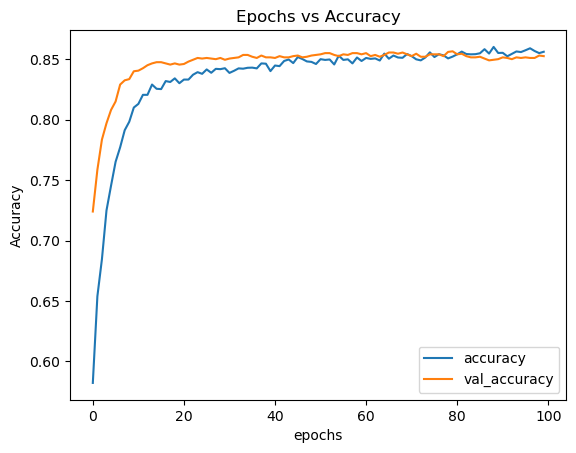

In [32]:
import matplotlib.pyplot as plt

epochs_range = range(len(history.history['accuracy']))

plt.plot(epochs_range,history.history['accuracy'])
plt.plot(epochs_range,history.history['val_accuracy'])
plt.xlabel('epochs')
plt.ylabel('Accuracy')
plt.title("Epochs vs Accuracy")
plt.legend(['accuracy','val_accuracy'],loc='lower right')


plt.show()

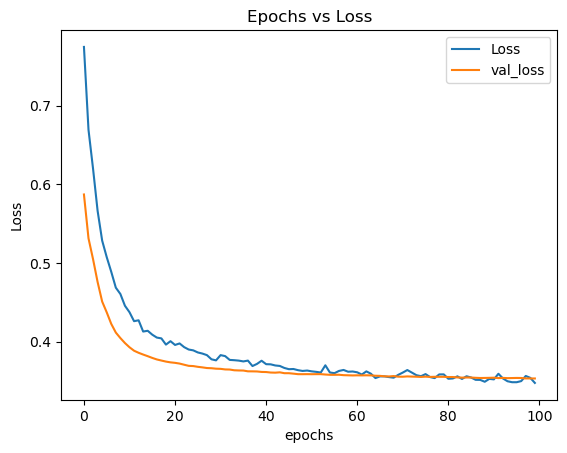

In [33]:
epochs_range = range(len(history.history['loss']))

plt.plot(epochs_range,history.history['loss'])
plt.plot(epochs_range,history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('Loss')
plt.title("Epochs vs Loss")
plt.legend(['Loss','val_loss'],loc='upper right')


plt.show()